Simple Logistic Regression Model for Breast Cancer Data

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = load_breast_cancer()
y=data.target
data = pd.DataFrame(data=data.data, columns=data.feature_names)
data["Target"]=y

Checking Data

In [4]:
data.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [5]:
#check shape
data.shape

(569, 31)

In [6]:
# check for imbalance
data["Target"].value_counts()

Target
1    357
0    212
Name: count, dtype: int64

In [7]:
# check which variables are categorical or object
a=data.select_dtypes(["category", "object"]).columns
print(len(a), a)

0 Index([], dtype='object')


In [8]:
# check for floats
a=data.select_dtypes(["float"]).columns
print(len(a), a)

30 Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [9]:
# check for int
a=data.select_dtypes(["int"]).columns
print(len(a), a)

1 Index(['Target'], dtype='object')


In [10]:
# check for missing values
for i,j in data.isna().sum().to_dict().items():
    if j>0:
        print(i,j)

In [11]:
# check 5 number summary
pd.set_option("display.max_columns", None)
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
# it seems there might be some outliers but let's not worry about them right now

Picking Important Features

In [13]:
# first let's just run feature importance on 10 seeds and pick the 10 most important
x=data.drop("Target",axis=1)
y=data["Target"]
models_perm=[]

for j in ["lbfgs", "liblinear", "newton-cg", "saga", "sag"]:    
    for i in range(0,10):    
        xT, xt, yT, yt = train_test_split(x, y, test_size=0.2, random_state=i)
        scaler=StandardScaler()
        xT=scaler.fit_transform(xT)
        xt=scaler.transform(xt)    
        for k in ["f1", "roc_auc"]:
            model=LogisticRegressionCV(solver=j, cv=6, scoring=k, penalty="l2")
            model.fit(xT, yT)
            pred=model.predict_proba(xt)[:,1]
            roc_score=roc_auc_score(yt,pred)
            f1score=f1_score(yt, (pred >= 0.5).astype(int))
            perm_importance=permutation_importance(estimator=model, X=xt, y=yt, n_jobs=-1, n_repeats=5, random_state=i)
            a=[j, i, k, f1score, roc_score]
            a.extend(abs(perm_importance.importances_mean))
            models_perm.append(a)

b=["Solver", "Seed", "Metric", "f1_score", "roc_score"]
b.extend(x.columns)
models_perm=pd.DataFrame(data=models_perm, columns=b)

In [14]:
models_perm.sort_values(by=["f1_score","roc_score"], ascending=False)

,Solver,Seed,Metric,f1_score,roc_score,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
98,sag,9,f1,0.993289,0.996622,0.010474,0.005298,0.010508,0.010474,0.009236,0.007911,0.014516,0.026704,0.001324,0.007911,0.023930,0.006587,0.009271,0.014659,0.005298,0.017396,0.000000,0.014446,0.002649,0.011815,0.027956,0.028226,0.023932,0.027956,0.017325,0.003973,0.022482,0.017095,0.018367,0.013334
99,sag,9,roc_auc,0.993289,0.996622,0.000405,0.000473,0.000405,0.000405,0.000405,0.000608,0.000541,0.002500,0.000000,0.000338,0.002703,0.000405,0.000405,0.000946,0.000405,0.001554,0.000135,0.000068,0.000068,0.000743,0.004392,0.005878,0.002905,0.003784,0.000878,0.000068,0.002770,0.002365,0.005473,0.000811
32,liblinear,6,f1,0.991453,0.996921,0.013474,0.022227,0.015212,0.018780,0.008519,0.008404,0.027476,0.030864,0.000000,0.005041,0.039792,0.000000,0.029327,0.038207,0.001739,0.019999,0.000000,0.001739,0.011793,0.010026,0.032399,0.042916,0.027356,0.032397,0.042250,0.001739,0.030835,0.023760,0.032453,0.017155
39,liblinear,9,roc_auc,0.986667,0.997297,0.001081,0.000270,0.001081,0.001014,0.000135,0.000338,0.000811,0.001554,0.000203,0.000743,0.002432,0.000405,0.000946,0.000743,0.000000,0.000946,0.000000,0.000135,0.000608,0.000541,0.003784,0.004662,0.002838,0.002905,0.001284,0.000000,0.001622,0.003243,0.004595,0.000135
78,saga,9,f1,0.986667,0.996959,0.011676,0.002667,0.011676,0.011676,0.002614,0.001324,0.009184,0.013211,0.000000,0.002596,0.015930,0.001307,0.006570,0.003974,0.000000,0.008036,0.000000,0.003921,0.002666,0.005193,0.021335,0.020226,0.015913,0.019958,0.010703,0.003973,0.013105,0.010473,0.013035,0.006712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,lbfgs,6,roc_auc,0.950820,0.997229,0.002155,0.003633,0.002032,0.001970,0.000431,0.000185,0.001970,0.002586,0.000185,0.001108,0.003387,0.000185,0.002032,0.004433,0.000123,0.001232,0.000308,0.000185,0.001539,0.001293,0.003571,0.005850,0.003264,0.002648,0.003633,0.001539,0.003448,0.002894,0.004064,0.000800
53,newton-cg,6,roc_auc,0.950820,0.997229,0.002155,0.003633,0.002032,0.001970,0.000431,0.000185,0.001970,0.002586,0.000185,0.001108,0.003387,0.000185,0.002032,0.004372,0.000123,0.001170,0.000246,0.000185,0.001539,0.001293,0.003571,0.005850,0.003264,0.002648,0.003633,0.001539,0.003448,0.002956,0.004064,0.000800
73,saga,6,roc_auc,0.950820,0.997229,0.002155,0.003633,0.002094,0.001970,0.000431,0.000185,0.001970,0.002586,0.000185,0.001108,0.003448,0.000185,0.002032,0.004433,0.000123,0.001232,0.000308,0.000185,0.001539,0.001293,0.003633,0.005850,0.003264,0.002648,0.003695,0.001539,0.003448,0.002956,0.004064,0.000800
93,sag,6,roc_auc,0.950820,0.997229,0.002155,0.003633,0.002094,0.001970,0.000431,0.000185,0.001970,0.002586,0.000185,0.001108,0.003448,0.000185,0.002032,0.004433,0.000123,0.001232,0.000308,0.000185,0.001539,0.001293,0.003633,0.005850,0.003264,0.002648,0.003695,0.001539,0.003448,0.002956,0.004064,0.000800


In [15]:
# first looks tell that f1 is sensitive while AUROC is not, scores are great overall
# so we will continue our analysis without bothering ourselves with the treatment of outliers

Deciding Solver

In [16]:
# decicing solver
for i in models_perm["Solver"].unique():
    z = models_perm[models_perm["Solver"]==i]
    print(f"{i} means {z[['f1_score','roc_score']].mean()}")

lbfgs means f1_score     0.975202
roc_score    0.996384
dtype: float64
liblinear means f1_score     0.979404
roc_score    0.995957
dtype: float64
newton-cg means f1_score     0.975215
roc_score    0.996301
dtype: float64
saga means f1_score     0.976816
roc_score    0.996034
dtype: float64
sag means f1_score     0.975844
roc_score    0.996244
dtype: float64


In [17]:
# let's assume that liblinear is best for the raw data as it gave highest f1 score 

In [18]:
lib_linear_results=models_perm[models_perm["Solver"]=="liblinear"]
lib_linear_results_f1=lib_linear_results[lib_linear_results["Metric"]=="f1"]
lib_linear_results_roc_auc=lib_linear_results[lib_linear_results["Metric"]=="roc_auc"]
lib_linear_results.sort_values(by="f1_score")

,Solver,Seed,Metric,f1_score,roc_score,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
28,liblinear,4,f1,0.954248,1.000000,0.006703,0.008096,0.005362,0.013389,0.005380,5.110689e-03,0.006756,0.013459,0.000054,0.000000,0.002520,0.008114,0.010778,0.017276,0.001358,0.001394,0.008114,0.005432,8.113666e-03,0.002817,0.021316,0.014314,0.022673,0.021316,0.007939,0.004057,0.002800,0.013459,0.009454,0.001340
20,liblinear,0,f1,0.970149,0.994919,0.001262,0.007476,0.001240,0.000197,0.000000,3.227002e-03,0.004511,0.001528,0.006036,0.003315,0.000092,0.000000,0.000020,0.003093,0.001790,0.010662,0.000263,0.001526,2.698273e-03,0.000372,0.004313,0.017779,0.002876,0.002876,0.004490,0.004312,0.009138,0.001700,0.001679,0.005860
21,liblinear,0,roc_auc,0.970149,0.994919,0.001207,0.003493,0.001080,0.001143,0.000000,3.175611e-04,0.001524,0.001969,0.001524,0.001461,0.002223,0.000000,0.000889,0.000826,0.001778,0.000699,0.000572,0.000953,5.080978e-04,0.000318,0.002668,0.006415,0.001905,0.001715,0.000889,0.000254,0.001969,0.001778,0.000826,0.000699
22,liblinear,1,f1,0.972973,0.992063,0.002759,0.005480,0.002777,0.001471,0.000000,1.323773e-03,0.000074,0.001324,0.001324,0.004083,0.003971,0.000000,0.003971,0.002648,0.002648,0.000000,0.000000,0.000000,0.000000e+00,0.001306,0.004083,0.010922,0.002777,0.001471,0.002868,0.002648,0.000147,0.001250,0.001102,0.002648
23,liblinear,1,roc_auc,0.972973,0.992063,0.000860,0.002778,0.000661,0.000794,0.002050,2.380952e-03,0.002183,0.001389,0.000728,0.002778,0.003638,0.000331,0.001653,0.000992,0.000132,0.001190,0.000198,0.000397,4.629630e-04,0.001190,0.001257,0.004696,0.000132,0.000595,0.000992,0.002116,0.001918,0.001323,0.001455,0.002315
35,liblinear,7,roc_auc,0.973684,0.998986,0.000743,0.002905,0.000608,0.000743,0.000203,2.220446e-17,0.002297,0.001959,0.000338,0.000405,0.006284,0.000135,0.002095,0.001959,0.000338,0.000473,0.000338,0.000000,1.351351e-04,0.000676,0.001959,0.005608,0.001554,0.001486,0.001081,0.000000,0.001554,0.001419,0.001014,0.000270
34,liblinear,7,f1,0.973684,0.998986,0.001307,0.001412,0.002579,0.003869,0.006465,9.096663e-03,0.002509,0.001219,0.009079,0.001290,0.002457,0.010386,0.003816,0.001220,0.003869,0.007772,0.006465,0.000000,3.868944e-03,0.002579,0.001220,0.013333,0.001220,0.001220,0.006359,0.000000,0.000140,0.001325,0.007755,0.014324
26,liblinear,3,f1,0.979866,0.994932,0.013262,0.017219,0.013262,0.013262,0.002613,0.000000e+00,0.011867,0.013245,0.001306,0.008037,0.006694,0.000000,0.003992,0.004081,0.003919,0.002613,0.000000,0.003919,0.000000e+00,0.002613,0.013262,0.013228,0.011884,0.011974,0.010668,0.001306,0.010561,0.014534,0.005298,0.001306
27,liblinear,3,roc_auc,0.979866,0.995608,0.000878,0.000946,0.000878,0.000811,0.000338,6.756757e-04,0.000878,0.001284,0.000000,0.000541,0.000676,0.000000,0.000203,0.000270,0.000338,0.001554,0.000000,0.000203,1.351351e-04,0.001149,0.001554,0.002095,0.001351,0.001486,0.002230,0.000203,0.001081,0.001554,0.002230,0.000608
29,liblinear,4,roc_auc,0.980892,1.000000,0.000000,0.000441,0.000000,0.000000,0.000000,2.205882e-04,0.000588,0.000147,0.000000,0.000221,0.000588,0.000000,0.000147,0.000074,0.000000,0.000735,0.000000,0.000000,1.470588e-04,0.000294,0.000441,0.003015,0.000294,0.000515,0.001103,0.000000,0.001176,0.000368,0.000441,0.000000


In [19]:
# clearly liblinear did a better job than sag and sag which were at the bottom

Analysing Top 10 with our solver

In [20]:
mean_importances=importances_liblinear_f1=lib_linear_results_f1.drop(["Solver", "Seed", "Metric", "f1_score", "roc_score"], axis=1).mean().reset_index(name="mean").sort_values(by="mean", ascending=False)
top_10=mean_importances.iloc[0:10,:]

In [21]:
top_10

,index,mean
21,worst texture,0.018104
20,worst radius,0.012979
24,worst smoothness,0.012664
23,worst area,0.012311
22,worst perimeter,0.011626
7,mean concave points,0.010941
28,worst symmetry,0.010596
27,worst concave points,0.010227
26,worst concavity,0.010224
10,radius error,0.010095


Deciding Regularization

In [22]:
x10=x[top_10["index"]]
y10=y
results=[]
for i in range(0,10):
    x10T, x10t, y10T, y10t=train_test_split(x10, y10, test_size=0.2, random_state=i)
    scaler=StandardScaler()
    x10T=scaler.fit_transform(x10T)
    x10t=scaler.transform(x10t)
    for j in ["l1", "l2"]:
        model=LogisticRegressionCV(solver="liblinear", cv=6, scoring="f1", penalty=j)
        model.fit(x10T, y10T)
        pred=model.predict(x10t)
        score=f1_score(y10t, pred)
        results.append({"Seed": i, "Penalty": j, "f1_score": score})
results=pd.DataFrame(results)

In [23]:
p1=models_perm[(models_perm["Solver"]=="liblinear") & (models_perm["Metric"]=="f1")]["f1_score"]
p2=results[results["Penalty"]=="l2"]["f1_score"]
print(p1.mean(), p2.mean())
#0.9784916224064985 0.9755695313627284

0.9784916224064985 0.9766564796266209


In [24]:
# F1 scores over l2 are similar, great

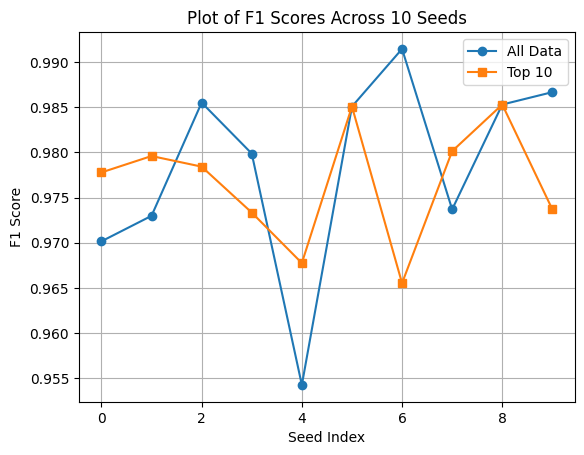

In [25]:
# Plot both series in a single figure
plt.plot(p1.values, label="All Data", marker="o")
plt.plot(p2.values, label="Top 10", marker="s")

plt.title("Plot of F1 Scores Across 10 Seeds")
plt.xlabel("Seed Index")
plt.ylabel("F1 Score")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# relying on top 10 looks more reliable, as performace doesn't dip isn't a lot

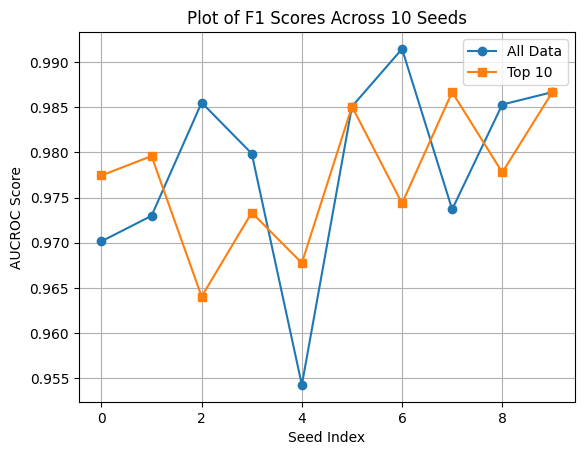

In [27]:
p1=models_perm[(models_perm["Solver"]=="liblinear") & (models_perm["Metric"]=="f1")]["f1_score"]
p2=results[results["Penalty"]=="l1"]["f1_score"]
plt.plot(p1.values, label="All Data", marker="o")
plt.plot(p2.values, label="Top 10", marker="s")
plt.title("Plot of F1 Scores Across 10 Seeds")
plt.xlabel("Seed Index")
plt.ylabel("AUCROC Score")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# there are more dips in l1 so, l2 is more reliable regularization, for f1
# let's look at the AUCROC

In [29]:
x10=x[top_10["index"]]
y10=y
results=[]
for i in range(0,10):
    x10T, x10t, y10T, y10t=train_test_split(x10, y10, test_size=0.2, random_state=i)
    scaler=StandardScaler()
    x10T=scaler.fit_transform(x10T)
    x10t=scaler.transform(x10t)
    for j in ["l1", "l2"]:
        model=LogisticRegressionCV(solver="liblinear", cv=6, scoring="f1", penalty=j)
        model.fit(x10T, y10T)
        pred=model.predict_proba(x10t)[:,1]
        score=roc_auc_score(y10t, pred)
        results.append({"Seed": i, "Penalty": j, "roc_auc_score": score})
results=pd.DataFrame(results)

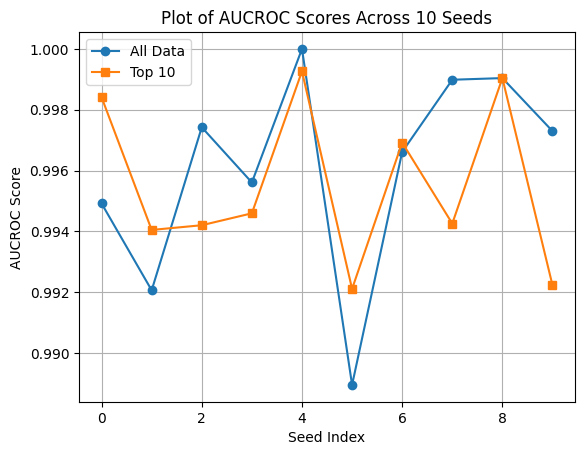

In [30]:
p1=models_perm[(models_perm["Solver"]=="liblinear") & (models_perm["Metric"]=="roc_auc")]["roc_score"]
p2=results[results["Penalty"]=="l2"]["roc_auc_score"]
plt.plot(p1.values, label="All Data", marker="o")
plt.plot(p2.values, label="Top 10", marker="s")
plt.title("Plot of AUCROC Scores Across 10 Seeds")
plt.xlabel("Seed Index")
plt.ylabel("AUCROC Score")
plt.legend()
plt.grid(True)
plt.show()

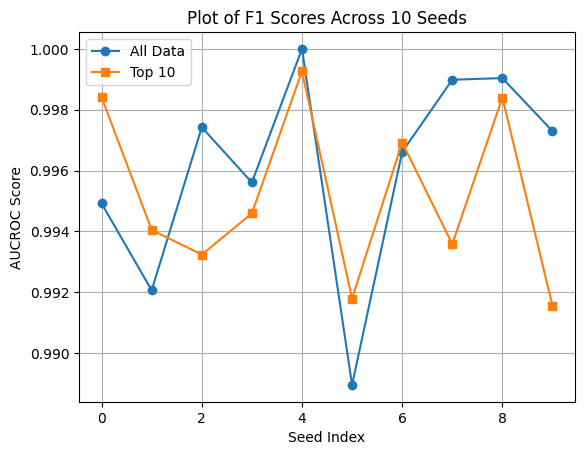

In [31]:
p1=models_perm[(models_perm["Solver"]=="liblinear") & (models_perm["Metric"]=="roc_auc")]["roc_score"]
p2=results[results["Penalty"]=="l1"]["roc_auc_score"]
plt.plot(p1.values, label="All Data", marker="o")
plt.plot(p2.values, label="Top 10", marker="s")
plt.title("Plot of F1 Scores Across 10 Seeds")
plt.xlabel("Seed Index")
plt.ylabel("AUCROC Score")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# AUCROC failed to capture the dipps so f1 is more reliable when comparing l1 and l2

Checking Impact of Class Imbalance

In [33]:
xT, xt, yT, yt=train_test_split(x, y, test_size=0.2, random_state=1)

scaler=StandardScaler()
xT=scaler.fit_transform(xT)
xt=scaler.transform(xt)

model=LogisticRegressionCV(solver="liblinear", scoring="f1", penalty="l2")
model.fit(xT, yT)
pred=model.predict(xt)
print(f1_score(yt, pred))

model=LogisticRegressionCV(solver="liblinear", scoring="f1", penalty="l2", class_weight="balanced")
model.fit(xT, yT)
pred=model.predict(xt)
print(f1_score(yt, pred))

0.9795918367346939
0.9863013698630136


In [34]:
# it seems there hardly any difference

1. We ran 10 seeds and looked at the F1 and AUROC scores, they yielded great results without class balancing strategy:
    1. For chosing scoring we looked at the F1 and AUROC scores mean of the 10 seeds using LogisticRegressionCV
    2. We chose liblinear over other solvers after seeing its superior F1 score, AUROC was nearly same for all
    3. We then looked at the feature importance values of 10 seeds and chose top 10 
    4. We then trained the models on top 10 using first L1 then L2
    5. Our comparison between the all data and top 10 revealed that top 10 were giving better stability
    6. We then saw that L2 gave more stable results than L1
    7. Finally we saw that that F1 is more reliable than AUROC for our data as it failed to capture differences in L1 and L2
    8. There is a slight gain if we apply class weights.

Optimization of Regularization Strength Using Inverse Lambda, C

Best C values across 10 seeds: [ 0.35938137  2.7825594   0.35938137  0.35938137  2.7825594   2.7825594
  0.35938137 21.5443469   0.35938137  0.35938137]
Mean C: 3.204831330522297
Standard Deviation of C: 6.208480370185177


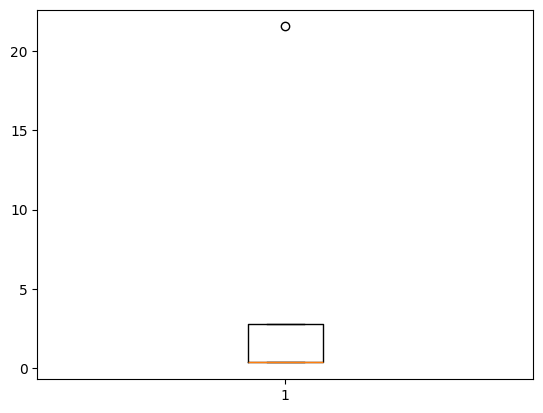

In [35]:
c_values_per_seed = []

for seed in range(10):
    xT, xt, yT, yt = train_test_split(x[top_10["index"]], y, test_size=0.2, random_state=seed)
    scaler = StandardScaler()
    xT = scaler.fit_transform(xT)
    xt = scaler.transform(xt)

    model = LogisticRegressionCV(solver="liblinear", penalty="l2", scoring="f1", cv=5)
    model.fit(xT, yT)
    c_values_per_seed.append(model.C_[0])

c_values_per_seed = np.array(c_values_per_seed)

print("Best C values across 10 seeds:", c_values_per_seed)
print("Mean C:", np.mean(c_values_per_seed))
print("Standard Deviation of C:", np.std(c_values_per_seed))
plt.boxplot(c_values_per_seed)
plt.show()

In [36]:
# looks like strength is unstable we need to adjust the size of cross validation or test or, we can treat ouliers
# if variance reduces great, so let's do the the inspection 

Checking Outliers

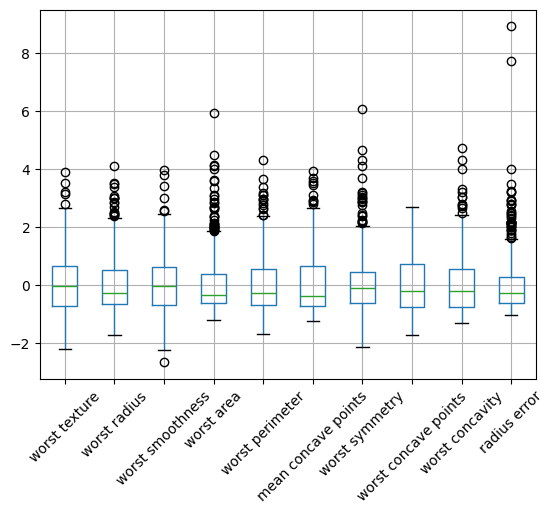

In [37]:
xn=x[top_10["index"]]
scaler=StandardScaler()
xnc=scaler.fit_transform(xn)
xnc=pd.DataFrame(data=xnc, columns=xn.columns)
xnc.boxplot()
plt.xticks(rotation=45)
plt.show()

In [38]:
# we have extreme outliers and ouliers, let's clip(Winsorization) the values at 99% and see if it fixes the issue
# we will deal the anamolous instances seperately, someday

In [39]:
upper_limits = xnc.quantile(0.99)

mask = (xnc > upper_limits).any(axis=1)

xf = xnc[~mask]
yf = y[~mask]

print(f"Original dataset size: {x.shape[0]}")
print(f"Filtered dataset size: {xf.shape[0]}")

Original dataset size: 569
Filtered dataset size: 533


In [40]:
# we lost a significant amount of data, very bad

Best C values across 10 seeds: [0.04641589 0.04641589 0.04641589 0.04641589 0.35938137 0.35938137
 0.04641589 0.04641589 0.35938137 0.04641589]
Mean C: 0.14030553174942823
Standard Deviation of C: 0.14341879930462043


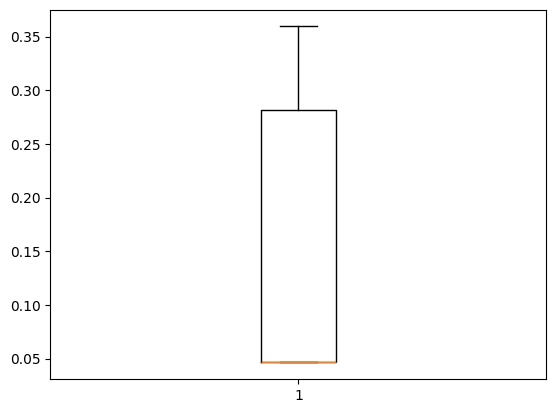

In [41]:
c_values_per_seed = []

for seed in range(10):
    xT, xt, yT, yt = train_test_split(xf, yf, test_size=0.2, random_state=seed)
    scaler = StandardScaler()
    xT = scaler.fit_transform(xT)
    xt = scaler.transform(xt)

    model = LogisticRegressionCV(solver="liblinear", penalty="l2", scoring="f1", cv=6)
    model.fit(xT, yT)
    c_values_per_seed.append(model.C_[0])

c_values_per_seed = np.array(c_values_per_seed)

print("Best C values across 10 seeds:", c_values_per_seed)
print("Mean C:", np.mean(c_values_per_seed))
print("Standard Deviation of C:", np.std(c_values_per_seed))
plt.boxplot(c_values_per_seed)
plt.show()

In [42]:
# great tiny winsorization solved the variance issue

In [43]:
final_c = np.median(c_values_per_seed)
print("Final Stable C:", final_c)

Final Stable C: 0.046415888336127774


In [44]:
# since median is near lower quartile taking median is another reason than taking means

Threshold Optimization

In [45]:
thresholds = np.arange(0.1, 0.9, 0.01)
best_thresholds = []

for seed in range(0, 10, 1):
    xT, xt, yT, yt=train_test_split(xf, yf, test_size=0.2, random_state=seed)
    scaler=StandardScaler()
    xT=scaler.fit_transform(xT)
    xt=scaler.transform(xt)

    model = LogisticRegressionCV(solver="liblinear", penalty="l2", cv=6, scoring="f1", Cs=[final_c])
    model.fit(xT, yT)    
    prob = model.predict_proba(xt)[:, 1]
    
    best_f1 = 0
    best_threshold = 0.5    
    for threshold in thresholds:
        pred = (prob > threshold).astype(int)
        f1 = f1_score(yt, pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    best_thresholds.append(best_threshold)

best_thresholds = np.array(best_thresholds)
final_threshold = np.median(best_thresholds)

print(final_threshold)

model=LogisticRegressionCV(solver="liblinear", scoring="f1", penalty="l2", random_state=1, Cs=[final_c])
model.fit(xT, yT)
pred=model.predict(xt)
print(f1_score(yt, pred))
probs=model.predict_proba(xt)[:,1]
pred=(probs>=final_threshold).astype(int)
print(f1_score(yt, pred))

0.44499999999999984
0.9929078014184397
0.9929078014184397


In [46]:
# the old threshold and new thresholds, gave same results after outlier treatment, this is icing on top

In [47]:
scs=[]
for i in range(0,10,1):
    xT, xt, yT, yt=train_test_split(x[top_10["index"]], y, test_size=0.2, random_state=i)
    scaler=StandardScaler()
    xT=scaler.fit_transform(xT)
    xt=scaler.transform(xt)

    model = LogisticRegressionCV(solver="liblinear", penalty="l2", cv=6, scoring="f1", Cs=[final_c])
    model.fit(xT, yT)    
    prob=model.predict_proba(xt)[:, 1]
    pred=(prob>=final_threshold).astype(int)

    sc=f1_score(yt, pred)
    scs.append(sc)

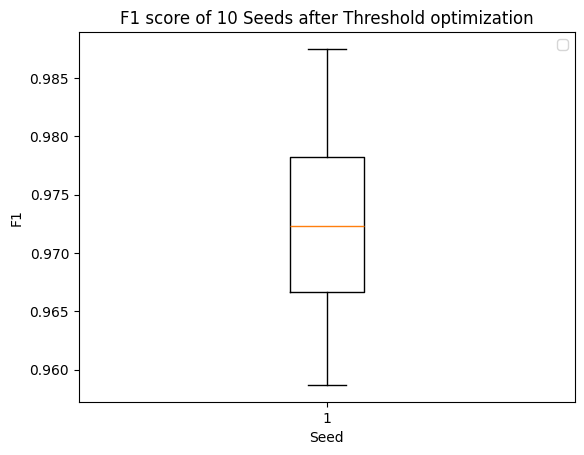

In [48]:
plt.boxplot(scs)
plt.title("F1 score of 10 Seeds after Threshold optimization")
plt.xlabel("Seed")
plt.ylabel("F1")
plt.legend()
plt.show()

In [49]:
# there are no outliers after threshold optimization which is a good sign
# the quartile are spread over the scale, generally not good but not a problem in our case
# finally the f1 has improve greatly

Final Blah Blah

1. We ran 10 seeds and looked at the F1 and AUROC scores, they yielded great results without class balancing strategy, forllowing were the results
    1. For chosing scoring we looked at the F1 and AUROC scores means of the 10 seeds using LogisticRegressionCV
    2. We chose liblinear over other solvers after seeing its superior F1 score, AUROC was similar for all
    3. We then looked at the feature importance values of 10 seeds and chose top 10
    4. We then trained the models on top 10 using first L1 then L2
    5. Our comparison between the all data and top 10 revealed that top 10 were giving better stability
    6. We then saw that L2 gave more stable results than L1
    7. Finally we saw that that F1 is more sensitive than AUROC for our data as it failed to capture differences in L1 and L2
    8. We might have gained from applying class weights
    9. We then found optimal regularization strength, which made us do outlier treatment
    10. We applied tiny winsorization
    11. We then found the optimal threshold